In [100]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.cloud import bigquery

In [101]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/home/jovyan/notebooks/kevinhnmb.github.io/CMSC320FinalProject-235d97f10aa6.json"

In [102]:
client = bigquery.Client()

In [103]:
date_range = ''

for i in range(1, 31):
    date_range += '_5_%d_20, ' % i
date_range += '_5_31_20'
    
QUERY = ('SELECT state, %s FROM `bigquery-public-data.covid19_usafacts.confirmed_cases` ' % date_range)

query_job = client.query(QUERY)  # API request
rows = query_job.result()  # Waits for query to finish

In [109]:
raw_cases = pd.read_gbq(QUERY,
                 project_id="cmsc320finalproject",
                 dialect='standard')

raw_cases

Downloading: 100%|██████████| 3195/3195 [00:01<00:00, 2539.66rows/s]


,state,_5_1_20,_5_2_20,_5_3_20,_5_4_20,_5_5_20,_5_6_20,_5_7_20,_5_8_20,_5_9_20,...,_5_22_20,_5_23_20,_5_24_20,_5_25_20,_5_26_20,_5_27_20,_5_28_20,_5_29_20,_5_30_20,_5_31_20
0,AL,929,946,969,992,1020,1048,1065,1094,1109,...,1498,1576,1614,1630,1645,1673,1715,1744,1780,1826
1,AZ,4156,4421,4585,4751,4929,5138,5196,5525,5779,...,7950,8177,8277,8379,8448,8627,8896,9112,9522,9937
2,AR,160,178,174,163,163,145,153,154,154,...,144,148,150,159,174,181,193,193,196,188
3,CA,1636,1705,1749,1776,1809,1863,1917,1961,2023,...,2708,2767,2847,2874,2986,3049,3097,3195,3289,3390
4,CA,907,934,945,947,969,985,999,1014,1036,...,1259,1296,1321,1336,1353,1375,1384,1404,1426,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,WA,47,53,53,59,60,62,62,64,65,...,71,72,72,73,73,73,73,73,73,73
3191,VA,56,56,56,59,61,61,61,61,64,...,67,69,69,69,69,70,72,73,73,77
3192,VA,51,55,55,55,58,58,63,65,66,...,104,108,108,108,122,129,129,129,134,134
3193,GA,59,59,59,60,61,64,64,65,65,...,93,95,95,99,102,107,113,118,118,119


In [110]:
by_state = raw_cases.groupby(['state'], as_index=False).sum()

by_state

,state,_5_1_20,_5_2_20,_5_3_20,_5_4_20,_5_5_20,_5_6_20,_5_7_20,_5_8_20,_5_9_20,...,_5_22_20,_5_23_20,_5_24_20,_5_25_20,_5_26_20,_5_27_20,_5_28_20,_5_29_20,_5_30_20,_5_31_20
0,AK,365,366,369,371,372,373,375,378,379,...,404,408,408,409,411,412,425,430,434,460
1,AL,7294,7611,7885,8110,8436,8691,9046,9384,9668,...,13670,14152,14507,15194,15648,16029,16553,17031,17358,17849
2,AR,3304,3358,3417,3461,3522,3607,3692,3745,3745,...,5610,5772,5920,6028,6177,6277,6531,6776,7010,7252
3,AZ,7961,8364,8640,8919,9304,9706,9944,10526,10960,...,15607,16039,16339,16560,16782,17261,17763,18465,19255,20119
4,CA,52253,53696,54947,56191,58752,60701,62373,64567,66799,...,90778,92664,94449,96673,99851,101877,104014,106651,110136,112703
5,CO,15766,16224,16624,16902,17364,17830,18371,18827,19371,...,23485,23954,24157,24248,24542,24766,25121,25612,26098,26378
6,CT,28764,29287,29287,29973,30621,30995,31783,32411,32984,...,39640,40022,40465,40873,41234,41288,41559,41762,42022,42201
7,DC,4658,4797,5016,5170,5322,5461,5654,5899,6102,...,7893,7966,8110,8225,8334,8406,8492,8538,8717,8801
8,DE,4918,5038,5208,5288,5371,5778,5939,6111,6280,...,8529,8690,8809,8965,9066,9096,9171,9236,9422,9498
9,FL,34725,35460,36078,36892,37429,38001,38828,39196,39998,...,49447,50127,50866,51745,52254,52633,53285,54496,55421,56161


In [120]:
all_us = by_state.drop(['state'], axis=1)
all_us = pd.DataFrame({'date': all_us.sum().index, 'cases':all_us.sum().values})
all_us

,date,cases
0,_5_1_20,1096406
1,_5_2_20,1126378
2,_5_3_20,1151544
3,_5_4_20,1173202
4,_5_5_20,1197324
5,_5_6_20,1220975
6,_5_7_20,1248587
7,_5_8_20,1275974
8,_5_9_20,1301552
9,_5_10_20,1321677


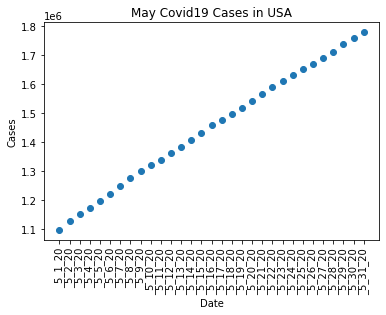

In [127]:
date = all_us['date']
cases = all_us['cases']

plt.plot(date, cases, 'o')
plt.title('May Covid19 Cases in USA')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Cases')
plt.show()